# Analyzing Horse Racing and Building Model to Predict Winners

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import shelve
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

C:\Users\Jim\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
with shelve.open('data/db') as db:
     horsedf = db['horsedf']

# Introduction

In this notebook, we will do the exploratory data analysis of the cleaned dataset that we have from the data wrangling notebook. We are trying to gain insight into the data set and identify the most important variables. Then, we will build a logistic regression model to predict the winner.

# Exploratory data analysis



## Predictor Variables Description

**Finishing_position** is the dependent variable which is the result of a horse race we want to predict. **Actual_weight, declared_horse_weight, draw, finish_time, win_odds, race_class, race_distance, jockey_1st, jockey_2nd, jockey_3rd, trainer_1st, trainer_2nd, trainer_3rd, daysince** are the independent variables for the prediction model which predict or forecast the values of the dependent variable in the model.

In [4]:
horsedf_new = horsedf[["finishing_position","actual_weight", "declared_horse_weight",
                       "draw", "speed","finish_time", "win_odds",
                       "race_distance", "jockey_1st", "jockey_2nd", "jockey_3rd",
                       "trainer_1st", "trainer_2nd", "trainer_3rd", "daysince"]]

## Basic Descriptive Statistics Plots

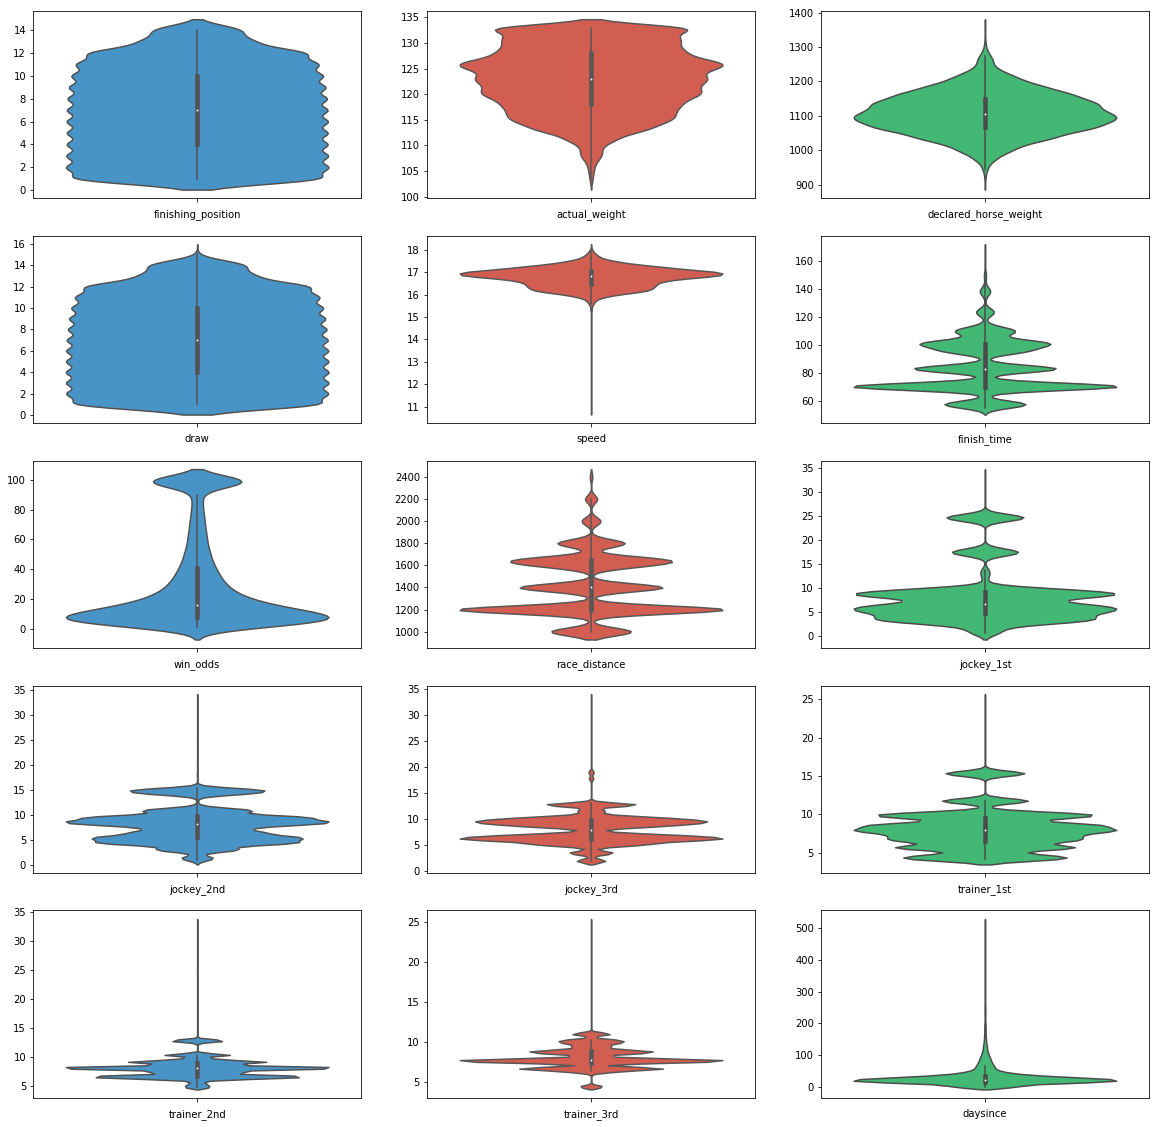

In [4]:
k = 0
palette = [ "#3498db", "#e74c3c", "#2ecc71"]

fig,axes = plt.subplots(5,3, figsize = (20,20), squeeze=False)
for i in range(5):
    for j in range(3):
            sns.violinplot(y = horsedf_new.columns[k], data = horsedf_new, color =palette[j],ax = axes[i,j])
            axes[i,j].set_xlabel(horsedf_new.columns[k])
            axes[i,j].set_ylabel('')
            k+=1



## Correlation Map - correlation between Variables
We can find the relationship between variables by plotting the correlation map.

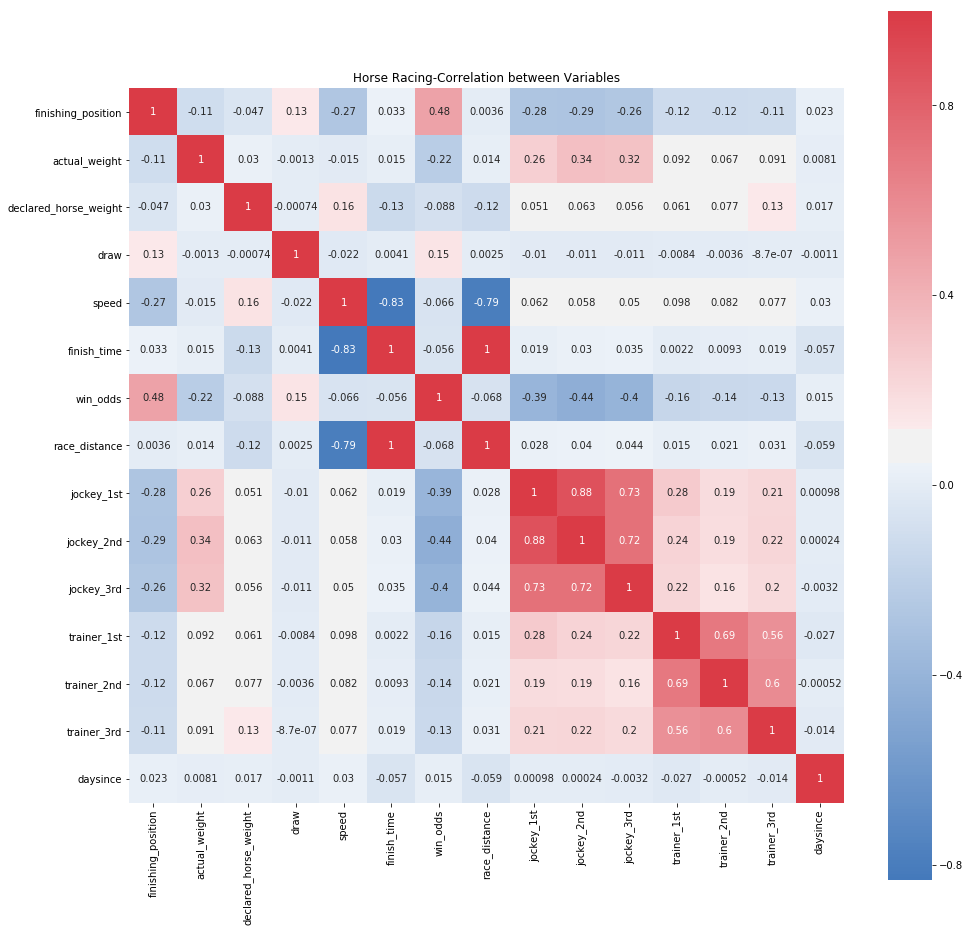

In [5]:
fig, ax = plt.subplots(figsize=(16,16))
fig = sns.heatmap(
    horsedf_new.corr(), 
    cmap = sns.diverging_palette(250,10,n=3,as_cmap = True ),
    square=True, 
    ax=ax, 
    annot = True, 
)
ax.set_title('Horse Racing-Correlation between Variables')
plt.savefig('img/heatmap.jpg', dpi=300)

We found that the correlation coefficient between race distance and finish time is 1. When correlation coefficient is 1, it implies that race distance and finish time have a perfect positive relationship. It makes sense because it takes more time for a longer distance, and vice versa.

As we can see the win_odds, jockey_1st, speed and draw have higher negative/positive correlations(0.48, -0.28, -0.27, 0.13, 0.096) with the finishing_position. We can plot the  plotting pairwise relationships between these variables.

## Pairwise Relationships Between Variables

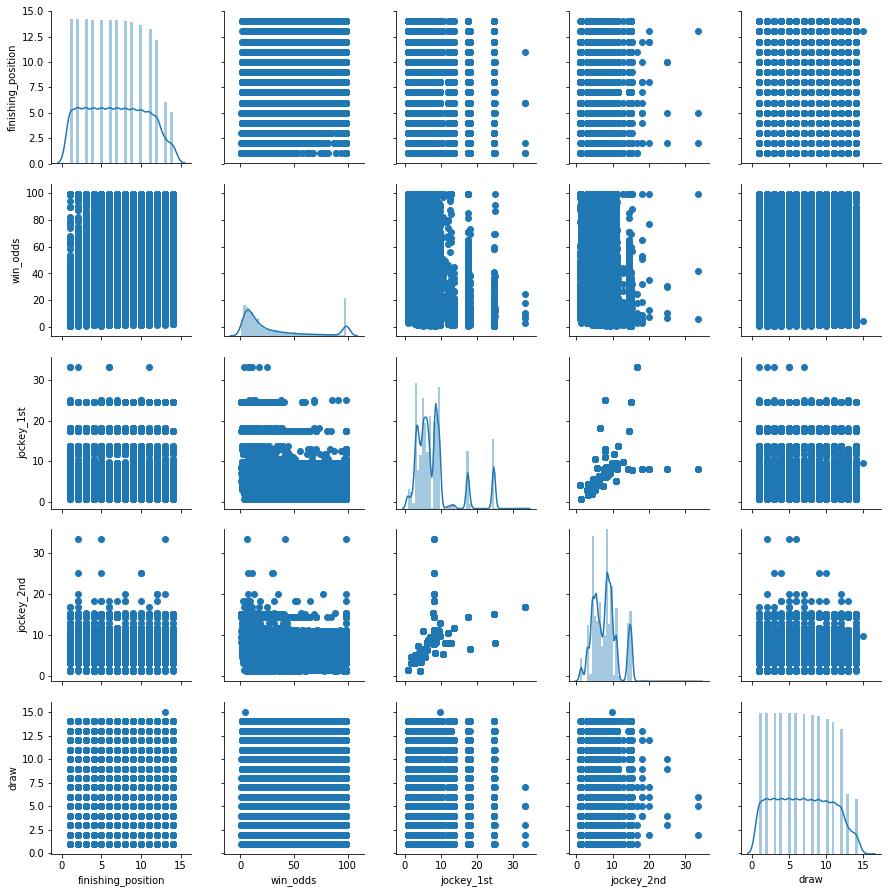

In [6]:
horsedf_plot=horsedf.loc[:,["finishing_position","win_odds", "jockey_1st", "jockey_2nd", "draw"]]

g = sns.PairGrid(horsedf_plot)
g = g.map_diag(sns.distplot)
g = g.map_offdiag(plt.scatter)
plt.savefig('img/Pairwise-Relationships.jpg', dpi=300)

## Separate Plots and Analysis of High Correlations Variables vs Finishing Position and Win (Finishing Position =1)

####  Win Odds vs Finishing Position (Win)


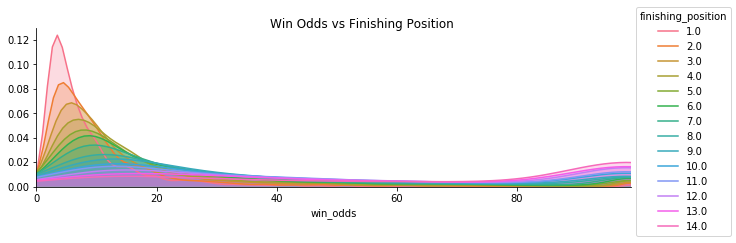

In [7]:
facet = sns.FacetGrid(horsedf, hue="finishing_position", aspect=3)
facet.map(sns.kdeplot, 'win_odds', shade= True)
facet.set(xlim=(0, horsedf["win_odds"].max()))
facet.add_legend()
facet.fig.suptitle('Win Odds vs Finishing Position')
plt.savefig('img/Win-Odds-vs-Finishing-Position.jpg', dpi=300)

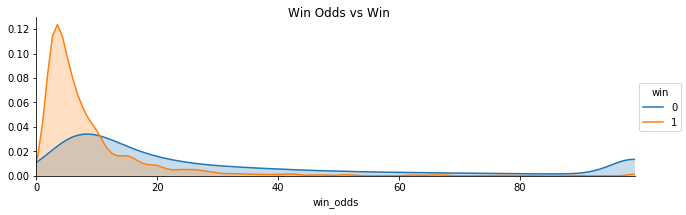

In [8]:
facet = sns.FacetGrid(horsedf, hue="win", aspect=3)
facet.map(sns.kdeplot, 'win_odds', shade= True)
facet.set(xlim=(0, horsedf["win_odds"].max()))
facet.add_legend()
facet.fig.suptitle('Win Odds vs Win')
plt.savefig('img/Win-Odds-vs-Win.jpg', dpi=300)

As we can see from the graphs above, it shows that win odds less than 15 have higher rates of a good finishing position, especially when finishing positions 1. It implies the lower the win odds, the higher the chane of winning.


#### Draw vs Finishing Position (Win)
Draw of a horse decides in which individual stall a horse is placed. The smaller the draw number, the closer the horse is to the inside rail, it means smaller draw numbers has an slight advantage over larger draw numbers since a shorter distance to be covered at the turns.

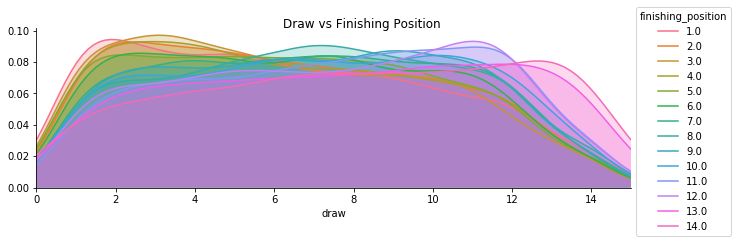

In [9]:
facet = sns.FacetGrid(horsedf, hue="finishing_position", aspect=3)
facet.map(sns.kdeplot, 'draw', shade= True)
facet.set(xlim=(0, horsedf["draw"].max()))
facet.add_legend()
facet.fig.suptitle('Draw vs Finishing Position')
plt.savefig('img/Draw-vs-Finishing-Position.jpg', dpi=300)

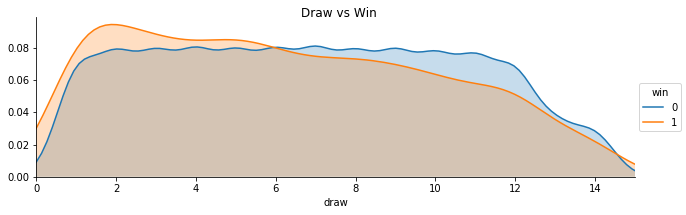

In [10]:
facet = sns.FacetGrid(horsedf, hue="win", aspect=3)
facet.map(sns.kdeplot, 'draw', shade= True)
facet.set(xlim=(0, horsedf["draw"].max()))
facet.add_legend()
facet.fig.suptitle('Draw vs Win')
plt.savefig('img/Draw-vs-Win.jpg', dpi=300)

As we can see from the graphs above, it is proved that draw numbers smaller than 6 has an advantage over draw numbers larger than 6. And the smaller the draw number, the larger the advantage.

####  Winning Percentage of Jockey vs Finishing Position
We can say that there is a realtionship between jockey performance and finishing position based on common sense. But we don't know the impact of a jockey on horse racing by guessing. However, somebody believes a good horse will win despite the jockey.

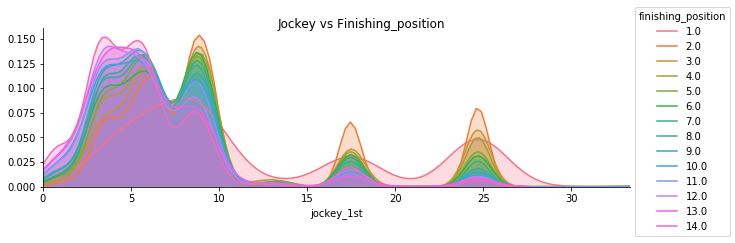

In [11]:
facet = sns.FacetGrid(horsedf, hue="finishing_position", aspect=3)
facet.map(sns.kdeplot, 'jockey_1st', shade= True)
facet.set(xlim=(0, horsedf["jockey_1st"].max()))
facet.add_legend()
facet.fig.suptitle('Jockey vs Finishing_position')
plt.savefig('img/Jockey-vs-Finishing-Position.jpg', dpi=300)

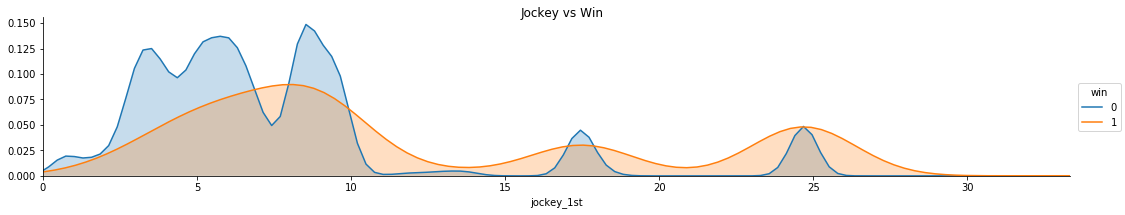

In [12]:
facet = sns.FacetGrid(horsedf, hue="win", aspect=5)
facet.map(sns.kdeplot, 'jockey_1st', shade= True)
facet.set(xlim=(0, horsedf["jockey_1st"].max()))
facet.add_legend()
facet.fig.suptitle('Jockey vs Win')
plt.savefig('img/Jockey-vs-Win.jpg', dpi=300)

As we can see from the graphs above, it shows that the winning percentage of jockey is less than 10 have much higher rates of not winning races based on our data set. It is proved that there is a strong realtionship between jockey performance and finishing position.

####  Speed vs Finishing Position
Speed should be one of the most important variables when we are picking the winner of a race. In the data wrangling, we divided the race distance(meter) by finish time(second) to get the speed. Therefore the speed is measured by meter per second.

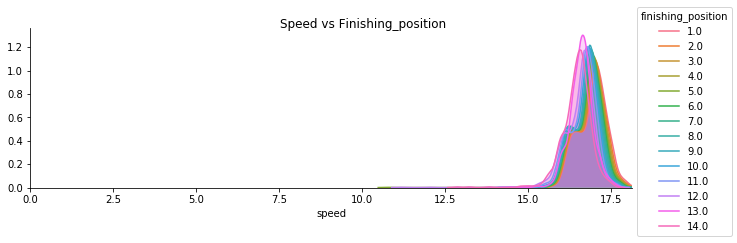

In [13]:
facet = sns.FacetGrid(horsedf, hue="finishing_position", aspect=3)
facet.map(sns.kdeplot, 'speed', shade= True)
facet.set(xlim=(0, horsedf["speed"].max()))
facet.add_legend()
facet.fig.suptitle('Speed vs Finishing_position')
plt.savefig('img/Speed-vs-Finishing-Position.jpg', dpi=300)

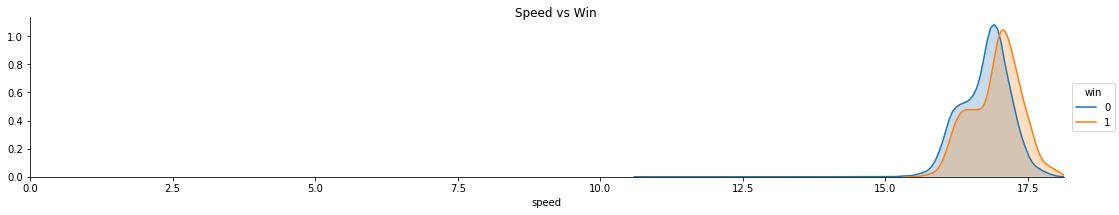

In [14]:
facet = sns.FacetGrid(horsedf, hue="win", aspect=5)
facet.map(sns.kdeplot, 'speed', shade= True)
facet.set(xlim=(0, horsedf["speed"].max()))
facet.add_legend()
facet.fig.suptitle('Speed vs Win')
plt.savefig('img/Speed-vs-Win.jpg', dpi=300)

As we can see from the graphs above, it shows that the speed faster than 17 meters per second has a better chance of winning. It is proved that there is a realtionship between speed and finishing position but not a strong relationship.

# Logistic Regression Model


In [6]:
#add race_id to the df for later use

horsedf_logit= horsedf[['race_id',"win","actual_weight", "declared_horse_weight",
                       "draw", "speed", "win_odds", "race_class",
                       "race_distance", "jockey_1st", "jockey_2nd", "jockey_3rd",
                       "trainer_1st", "trainer_2nd", "trainer_3rd", "daysince"]]

In [7]:
race_class = pd.get_dummies(horsedf_logit['race_class'],drop_first=True)
horsedf_logit.drop('race_class',axis=1,inplace=True)
horsedf_logit = pd.concat([horsedf_logit,race_class],axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(horsedf_logit.drop('win',axis=1), 
                                                    horsedf_logit['win'], test_size=0.30, 
                                                    random_state=101)

In [19]:
#exclude the race_id 
logit_model=sm.Logit(y_train,X_train.iloc[:,1:])
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.239216
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               No. Iterations:      9.0000    
Dependent Variable:      win                 Pseudo R-squared:    0.148     
Date:                    2018-07-31 05:32    AIC:                 9889.6925 
No. Observations:        20554               BIC:                 10111.7552
Df Model:                27                  Log-Likelihood:      -4916.8   
Df Residuals:            20526               LL-Null:             -5768.0   
Converged:               1.0000              Scale:               1.0000    
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
actual_weight               -0.0310   0.0046  -6.7626 0.0000 -0.0399 -0.0220
declared_horse_weight       -0.0008   0.0005  -1.8294 0.0673 -0.0017  0.0001
draw                        -0.0107   0.0074  -1.4498 0.1471 -0.0253  0.0038
speed                        0.2190   0.0401   5.4642 0.0000  0.1404  0.2975
win_odds                    -0.0692   0.0036 -18.9835 0.0000 -0.0763 -0.0620
race_distance               -0.0000   0.0001  -0.2272 0.8203 -0.0002  0.0002
jockey_1st                   0.0489   0.0099   4.9365 0.0000  0.0295  0.0683
jockey_2nd                  -0.0035   0.0178  -0.1991 0.8422 -0.0385  0.0314
jockey_3rd                  -0.0186   0.0157  -1.1836 0.2366 -0.0493  0.0122
trainer_1st                  0.0756   0.0152   4.9771 0.0000  0.0458  0.1053
trainer_2nd                 -0.0520   0.0219  -2.3733 0.0176 -0.0949 -0.0091
trainer_3rd                 -0.0690   0.0262  -2.6304 0.0085 -0.1204 -0.0176
daysince                     0.0006   0.0009   0.7123 0.4763 -0.0011  0.0023
Class 2                     -0.1746   0.1891  -0.9233 0.3559 -0.5453  0.1961
Class 3                     -0.1615   0.1750  -0.9229 0.3561 -0.5044  0.1815
Class 3 (Special Condition)  0.5318   0.8110   0.6557 0.5120 -1.0577  2.1214
Class 4                     -0.1589   0.1752  -0.9073 0.3642 -0.5023  0.1844
Class 4 (Restricted)        -0.0951   0.5172  -0.1839 0.8541 -1.1088  0.9186
Class 4 (Special Condition) -0.3456   0.6370  -0.5425 0.5875 -1.5942  0.9030
Class 5                     -0.1713   0.1852  -0.9248 0.3550 -0.5342  0.1917
Griffin Race                 0.1612   0.3693   0.4366 0.6624 -0.5626  0.8851
Group One                   -0.0161   0.2976  -0.0543 0.9567 -0.5995  0.5672
Group Three                 -0.0643   0.4116  -0.1563 0.8758 -0.8711  0.7424
Group Two                    0.1362   0.3981   0.3423 0.7321 -0.6439  0.9164
Hong Kong Group One          0.4970   0.4400   1.1296 0.2586 -0.3654  1.3594
Hong Kong Group Three       -0.2870   0.3166  -0.9066 0.3646 -0.9075  0.3335
Hong Kong Group Two         -0.2074   0.5213  -0.3979 0.6907 -1.2291  0.8142
Restricted Race              0.2967   0.5421   0.5472 0.5842 -0.7659  1.3592
============================================================================

"""

As we can see from the logistic regression model summary, most variables have small p-values which mean they are statistically significant. However, some variables have a large P-value which can be removed from the model, e.g., race_distance, jockey_2nd. Meanwhile, some variables have a p-value between 0.2 to 0.5 which is not statistically significant, but we cannot determine whether we should remove it or not unless we do the cross-validation.